In [1]:
clobber_ws3 = True
if clobber_ws3:
    %pip uninstall -y ws3
    %pip install -e ..

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import ws3
import ws3.forest
from util import gen_scenario, run_scenario

base_year = 2020
horizon = 10
period_length = 10
max_age = 1000
n_steps = 100
tvy_name = 'totvol'    

In [5]:
fm = ws3.forest.ForestModel(model_name='tsa24_clipped',
                            model_path='data/woodstock_model_files',
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)
fm.import_landscape_section()
fm.import_areas_section()
fm.import_yields_section()
fm.import_actions_section()
fm.import_transitions_section()
fm.initialize_areas()
fm.add_null_action()
fm.reset_actions()

running base scenario
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Xeon(R) Gold 6254 CPU @ 3.10GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 36 physical cores, 72 logical processors, using up to 32 threads

Optimize a model with 72 rows, 305 columns and 3425 nonzeros
Model fingerprint: 0x6b8d717f
Coefficient statistics:
  Matrix range     [3e-02, 4e+04]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 72 rows and 305 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective -0.000000000e+00


(<Figure size 1200x400 with 3 Axes>,
    period  oha  ohv            ogs
 0       1  0.0  0.0  151093.384592
 1       2  0.0  0.0  165236.918505
 2       3  0.0  0.0  178303.655667
 3       4  0.0  0.0  191999.264834
 4       5  0.0  0.0  207194.009710
 5       6  0.0  0.0  221550.900946
 6       7  0.0  0.0  233036.124165
 7       8  0.0  0.0  241132.854873
 8       9  0.0  0.0  246339.462918
 9      10  0.0  0.0  249239.247818,
 <ws3.opt.Problem at 0x74ba175b4fe0>)

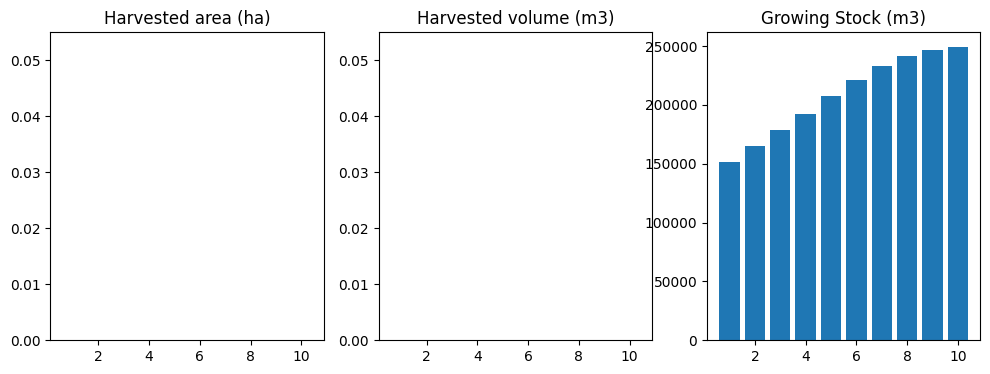

In [15]:
run_scenario(fm)

In [40]:
fm.actions['harvest'].is_harvest = True

In [41]:
fm.is_harvest('harvest')

True

running base scenario


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/ca10c3c31b814d76b09d20e6b36f793f-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/ca10c3c31b814d76b09d20e6b36f793f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 77 COLUMNS
At line 3776 RHS
At line 3849 BOUNDS
At line 4155 ENDATA
Problem MODEL has 72 rows, 305 columns and 3425 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 60 (-12) rows, 273 (-32) columns and 3177 (-248) elements
0  Obj -0 Dual inf 2157186.5 (273)
31  Obj 356278.96 Primal inf 552.65217 (34)
62  Obj 226577.36 Primal inf 102.20951 (29)
96  Obj 196411.63 Primal inf 108.38634 (20)
128  Obj 193897.17 Primal inf 1.1298009 (7)
137  Obj 193807.07
Optimal - objective value 193807.07
After Postsolve, objective 193807.07, infeasibili

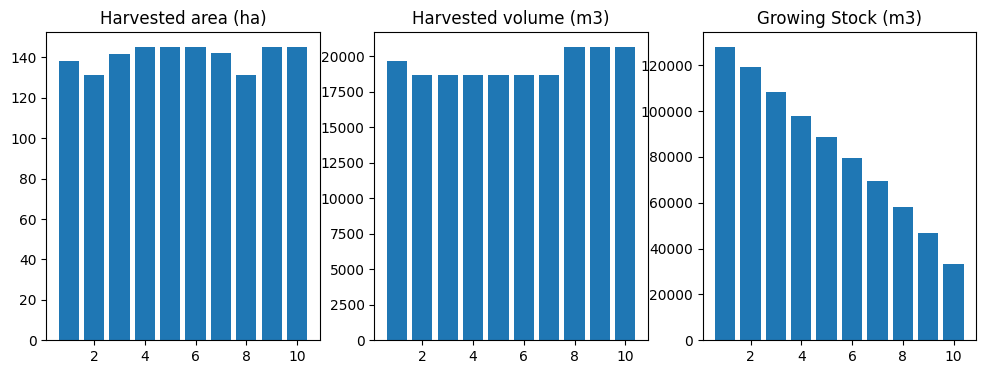

In [45]:
problem = run_scenario(fm)

In [42]:
p = gen_scenario(fm)
p.solver('pulp')

In [43]:
pp = p.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/b139cf76cc92489cb194590c4e856411-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/b139cf76cc92489cb194590c4e856411-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 37 COLUMNS
At line 616 RHS
At line 649 BOUNDS
At line 955 ENDATA
Problem MODEL has 32 rows, 305 columns and 305 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-32) rows, 0 (-305) columns and 0 (-305) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 224552.85
After Postsolve, objective 224552.85, infeasibilities - dual 1787704.2 (249), primal 0 (0)
Presolved model was optimal, full model needs cleaning up
0  Obj 224552.85 Dual inf 1787704.2 (249)
24  Obj 224552.85
Optimal - objective value 2245

In [7]:
problem

In [10]:
problem.solver('pulp')
problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/d4cc5f772e674369996783c8c477c4e8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/d4cc5f772e674369996783c8c477c4e8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 37 COLUMNS
At line 344 RHS
At line 377 BOUNDS
At line 684 ENDATA
Problem MODEL has 32 rows, 306 columns and 305 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-32) rows, 0 (-306) columns and 0 (-305) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value -0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds)

base:
MAXIMIZE
0*__dummy + 0
SUBJECT TO
cov_4459436052594312017: _x__909787312700445365 = 1

cov__3310474366362770769: _x_5906977774188925999 = 1

cov_2968001905405329933: _x__6171840037161004207 = 1

cov__5525789643873978814: _x__7273825674327802019 = 1

cov_752686627894121888: _x__905899411968180609 = 1

cov__7017223791062960898: _x_4578647860097736181 = 1

cov__738747519294860196: _x_4787036547452439720 = 1

cov_5957084405936863105: _x__3363599676880053842 = 1

cov_7513953283870331790: _x_2144403164429048257 + _x_3111729042535908298
 + _x_8242297093834289344 + _x__2110263347081654868 + _x__3220206900511247425
 + _x__4326306128523875099 + _x__4597733169111266827 + _x__567799898306494754
 + _x__6305636215696712610 + _x__651881442628760134 + _x__7782337133892725016
 = 1

cov_2082490722364777024: _x_4278713189174226766 + _x_4392606219735326682
 + _x_5705534287534229625 + _x_6713535104995830428 + _x_7413437334119675408
 + _x_7684864374707067136 + _x__1543479515469937586 + _x__25916338596

In [12]:
problem.solution()

{'x_-909787312700445365': 1.0,
 'x_5906977774188925999': 1.0,
 'x_-6171840037161004207': 1.0,
 'x_-7273825674327802019': 1.0,
 'x_-905899411968180609': 1.0,
 'x_4578647860097736181': 1.0,
 'x_4787036547452439720': 1.0,
 'x_-3363599676880053842': 1.0,
 'x_-3220206900511247425': 0.0,
 'x_-4597733169111266827': 0.0,
 'x_-4326306128523875099': 0.0,
 'x_-7782337133892725016': 0.0,
 'x_-2110263347081654868': 0.0,
 'x_2144403164429048257': 0.0,
 'x_3111729042535908298': 0.0,
 'x_-6305636215696712610': 0.0,
 'x_8242297093834289344': 0.0,
 'x_-567799898306494754': 0.0,
 'x_-651881442628760134': 1.0,
 'x_4392606219735326682': 0.0,
 'x_7413437334119675408': 0.0,
 'x_7684864374707067136': 0.0,
 'x_-2817195919296639606': 0.0,
 'x_-1543479515469937586': 0.0,
 'x_-4291170406049561124': 0.0,
 'x_-7722201910927069211': 0.0,
 'x_5705534287534229625': 0.0,
 'x_-2591633859628688165': 0.0,
 'x_-7003373468785104135': 0.0,
 'x_-7087455013107369515': 0.0,
 'x_6713535104995830428': 1.0,
 'x_-871237785432937246